In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cleaned_df.csv")

In [3]:
data

,index,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,stroke,censor_time_stroke,chd,censor_time_chd,hf,censor_time_hf,death,censor_time_death,cvd_death,censor_time_cvd_death
0,0,1.26380,0.15319,0.268090,0.21212,0.37021,0.89362,0.41429,0.12121,0.20426,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
1,1,0.82500,0.22500,0.133330,0.16162,0.31667,0.50833,0.62295,0.27273,0.19167,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
2,2,0.56038,0.27170,0.096226,0.17172,0.28868,0.27170,1.06250,0.48485,0.23208,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
3,3,1.06070,0.13929,0.267860,0.25253,0.37500,0.68571,0.54688,0.13131,0.22500,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
4,4,0.95806,0.11613,0.241940,0.25253,0.31935,0.63871,0.50000,0.12121,0.19355,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127519,168645,0.88657,0.25075,0.125370,0.14141,0.33134,0.55522,0.59677,0.28283,0.20597,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
127520,168646,0.91385,0.16615,0.230770,0.25253,0.33231,0.58154,0.57143,0.18182,0.21231,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
127521,168647,0.88657,0.11642,0.250750,0.28283,0.33134,0.55522,0.59677,0.13131,0.19701,...,False,3650.0,False,3650.0,False,3650.0,False,3650.0,False,3650.0
127522,168648,1.16470,0.14118,0.282350,0.24242,0.38824,0.77647,0.50000,0.12121,0.22353,...,False,3650.0,True,923.0,False,3650.0,False,3650.0,False,3650.0


In [10]:
data_predictors = data.iloc[:, 0:55]

In [11]:
data_predictors.head()

,index,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,SI,Diabetes diagnosed by doctor,Smoking status,Age when attended assessment centre,mean sbp,BMI,Sex,Ethnic background,cholesterol HDL ratio,bp medication
0,0,1.26380,0.15319,0.268090,0.21212,0.37021,0.89362,0.41429,0.12121,0.20426,...,11.684836,No,Never,54.0,110.5,24.531070,Male,white/not recorded,4.245516,0.0
1,1,0.82500,0.22500,0.133330,0.16162,0.31667,0.50833,0.62295,0.27273,0.19167,...,7.244444,No,Never,56.0,122.5,26.120667,Female,white/not recorded,4.223134,1.0
2,2,0.56038,0.27170,0.096226,0.17172,0.28868,0.27170,1.06250,0.48485,0.23208,...,6.404122,No,Never,50.0,158.0,25.663892,Male,white/not recorded,2.741799,0.0
3,3,1.06070,0.13929,0.267860,0.25253,0.37500,0.68571,0.54688,0.13131,0.22500,...,11.558619,No,Never,65.0,136.5,20.176691,Female,white/not recorded,2.640096,0.0
4,4,0.95806,0.11613,0.241940,0.25253,0.31935,0.63871,0.50000,0.12121,0.19355,...,15.241540,No,Previous,69.0,160.5,26.078075,Male,white/not recorded,5.128898,1.0


In [12]:
data_predictors.shape

(127524, 55)

In [13]:
# data preprocessing

In [14]:
data_predictors

,index,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,SI,Diabetes diagnosed by doctor,Smoking status,Age when attended assessment centre,mean sbp,BMI,Sex,Ethnic background,cholesterol HDL ratio,bp medication
0,0,1.26380,0.15319,0.268090,0.21212,0.37021,0.89362,0.41429,0.12121,0.20426,...,11.684836,No,Never,54.0,110.5,24.531070,Male,white/not recorded,4.245516,0.0
1,1,0.82500,0.22500,0.133330,0.16162,0.31667,0.50833,0.62295,0.27273,0.19167,...,7.244444,No,Never,56.0,122.5,26.120667,Female,white/not recorded,4.223134,1.0
2,2,0.56038,0.27170,0.096226,0.17172,0.28868,0.27170,1.06250,0.48485,0.23208,...,6.404122,No,Never,50.0,158.0,25.663892,Male,white/not recorded,2.741799,0.0
3,3,1.06070,0.13929,0.267860,0.25253,0.37500,0.68571,0.54688,0.13131,0.22500,...,11.558619,No,Never,65.0,136.5,20.176691,Female,white/not recorded,2.640096,0.0
4,4,0.95806,0.11613,0.241940,0.25253,0.31935,0.63871,0.50000,0.12121,0.19355,...,15.241540,No,Previous,69.0,160.5,26.078075,Male,white/not recorded,5.128898,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127519,168645,0.88657,0.25075,0.125370,0.14141,0.33134,0.55522,0.59677,0.28283,0.20597,...,6.340977,No,Never,68.0,143.0,26.620782,Female,white/not recorded,3.856798,0.0
127520,168646,0.91385,0.16615,0.230770,0.25253,0.33231,0.58154,0.57143,0.18182,0.21231,...,11.375263,No,Previous,42.0,125.0,24.831332,Male,white/not recorded,3.468806,0.0
127521,168647,0.88657,0.11642,0.250750,0.28283,0.33134,0.55522,0.59677,0.13131,0.19701,...,13.829239,No,Never,67.0,146.0,24.999036,Female,white/not recorded,4.642319,0.0
127522,168648,1.16470,0.14118,0.282350,0.24242,0.38824,0.77647,0.50000,0.12121,0.22353,...,12.289276,No,Previous,67.0,168.0,39.100067,Male,white/not recorded,2.950429,1.0


In [15]:
data_predictors['Diabetes diagnosed by doctor'].unique()

array(['No', 'Yes', 'Do not know', 'Prefer not to answer'], dtype=object)

In [16]:
data_predictors["Diabetes diagnosed by doctor"].value_counts()

No                      120261
Yes                       6721
Do not know                367
Prefer not to answer       175
Name: Diabetes diagnosed by doctor, dtype: int64

In [17]:
# change do not know to 'no'

In [18]:
data_predictors['Diabetes diagnosed by doctor'].mask(data_predictors['Diabetes diagnosed by doctor'] == 'Do not know', 'No', inplace=True)

In [19]:
data_predictors['Diabetes diagnosed by doctor'].unique()

array(['No', 'Yes', 'Prefer not to answer'], dtype=object)

In [20]:
data_predictors["Diabetes diagnosed by doctor"].value_counts()

No                      120628
Yes                       6721
Prefer not to answer       175
Name: Diabetes diagnosed by doctor, dtype: int64

In [21]:
# Now collapse ethnicity

In [22]:
data_predictors['Ethnic background'].value_counts()

white/not recorded       116559
Indian                     2833
other including mixed      2709
black Caribbean            2046
black African              1328
other Asian                 862
Pakistani                   608
Chinese                     511
Bangladeshi                  68
Name: Ethnic background, dtype: int64

In [23]:
data_predictors['Ethnic background'].mask(data_predictors['Ethnic background'] == 'Indian', 'Asian', inplace=True)
data_predictors['Ethnic background'].mask(data_predictors['Ethnic background'] == 'other Asian', 'Asian', inplace=True)
data_predictors['Ethnic background'].mask(data_predictors['Ethnic background'] == 'Pakistani', 'Asian', inplace=True)
data_predictors['Ethnic background'].mask(data_predictors['Ethnic background'] == 'Chinese', 'Asian', inplace=True)
data_predictors['Ethnic background'].mask(data_predictors['Ethnic background'] == 'Bangladeshi', 'Asian', inplace=True)

data_predictors['Ethnic background'].mask(data_predictors['Ethnic background'] == 'black Caribbean', 'Black', inplace=True)
data_predictors['Ethnic background'].mask(data_predictors['Ethnic background'] == 'black African', 'Black', inplace=True)

In [24]:
data_predictors['Ethnic background'].value_counts()

white/not recorded       116559
Asian                      4882
Black                      3374
other including mixed      2709
Name: Ethnic background, dtype: int64

In [25]:
data_predictors.head()

,index,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,SI,Diabetes diagnosed by doctor,Smoking status,Age when attended assessment centre,mean sbp,BMI,Sex,Ethnic background,cholesterol HDL ratio,bp medication
0,0,1.26380,0.15319,0.268090,0.21212,0.37021,0.89362,0.41429,0.12121,0.20426,...,11.684836,No,Never,54.0,110.5,24.531070,Male,white/not recorded,4.245516,0.0
1,1,0.82500,0.22500,0.133330,0.16162,0.31667,0.50833,0.62295,0.27273,0.19167,...,7.244444,No,Never,56.0,122.5,26.120667,Female,white/not recorded,4.223134,1.0
2,2,0.56038,0.27170,0.096226,0.17172,0.28868,0.27170,1.06250,0.48485,0.23208,...,6.404122,No,Never,50.0,158.0,25.663892,Male,white/not recorded,2.741799,0.0
3,3,1.06070,0.13929,0.267860,0.25253,0.37500,0.68571,0.54688,0.13131,0.22500,...,11.558619,No,Never,65.0,136.5,20.176691,Female,white/not recorded,2.640096,0.0
4,4,0.95806,0.11613,0.241940,0.25253,0.31935,0.63871,0.50000,0.12121,0.19355,...,15.241540,No,Previous,69.0,160.5,26.078075,Male,white/not recorded,5.128898,1.0


In [26]:
data_predictors_dummies = pd.get_dummies(data_predictors, columns=['Diabetes diagnosed by doctor','Smoking status','Sex','Ethnic background', 'bp medication'])

In [27]:
data_predictors_dummies

,index,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,1.26380,0.15319,0.268090,0.21212,0.37021,0.89362,0.41429,0.12121,0.20426,...,0,0,0,1,0,0,0,1,1,0
1,1,0.82500,0.22500,0.133330,0.16162,0.31667,0.50833,0.62295,0.27273,0.19167,...,0,0,1,0,0,0,0,1,0,1
2,2,0.56038,0.27170,0.096226,0.17172,0.28868,0.27170,1.06250,0.48485,0.23208,...,0,0,0,1,0,0,0,1,1,0
3,3,1.06070,0.13929,0.267860,0.25253,0.37500,0.68571,0.54688,0.13131,0.22500,...,0,0,1,0,0,0,0,1,1,0
4,4,0.95806,0.11613,0.241940,0.25253,0.31935,0.63871,0.50000,0.12121,0.19355,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127519,168645,0.88657,0.25075,0.125370,0.14141,0.33134,0.55522,0.59677,0.28283,0.20597,...,0,0,1,0,0,0,0,1,1,0
127520,168646,0.91385,0.16615,0.230770,0.25253,0.33231,0.58154,0.57143,0.18182,0.21231,...,0,1,0,1,0,0,0,1,1,0
127521,168647,0.88657,0.11642,0.250750,0.28283,0.33134,0.55522,0.59677,0.13131,0.19701,...,0,0,1,0,0,0,0,1,1,0
127522,168648,1.16470,0.14118,0.282350,0.24242,0.38824,0.77647,0.50000,0.12121,0.22353,...,0,1,0,1,0,0,0,1,0,1


In [30]:
data_output_cv = data['cv']

In [31]:
data_output_cv

0         False
1         False
2         False
3         False
4         False
          ...  
127519    False
127520    False
127521    False
127522     True
127523    False
Name: cv, Length: 127524, dtype: bool

In [32]:
data_output_cv.replace({False: 0, True: 1}, inplace=True)

In [33]:
data_output_cv

0         0
1         0
2         0
3         0
4         0
         ..
127519    0
127520    0
127521    0
127522    1
127523    0
Name: cv, Length: 127524, dtype: int64

In [38]:
type(data_output_cv)

pandas.core.series.Series

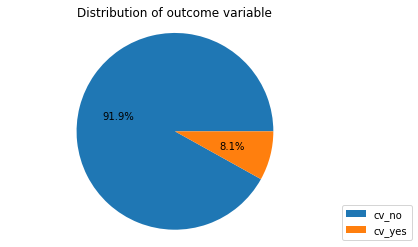

In [39]:
labels = ['cv_no', 'cv_yes']
sizes = data_output_cv.value_counts()
pie = plt.pie(sizes, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of outcome variable')
plt.legend(loc = (1,0), labels=labels)
plt.show()

In [40]:
data_predictors_dummies.to_csv("preprocessed_data.csv")

In [41]:
# plotting

(array([3.60000e+01, 1.61430e+04, 1.03959e+05, 3.60700e+03, 1.73700e+03,
        1.62700e+03, 3.53000e+02, 4.80000e+01, 1.00000e+01, 4.00000e+00]),
 array([0.11586 , 0.204274, 0.292688, 0.381102, 0.469516, 0.55793 ,
        0.646344, 0.734758, 0.823172, 0.911586, 1.      ]),
 <BarContainer object of 10 artists>)

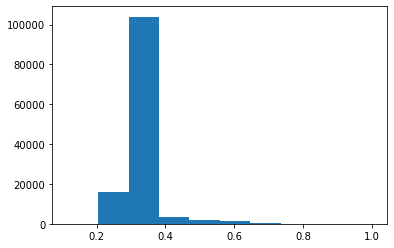

In [42]:
# histogram of t_sys
plt.hist(data_predictors_dummies['t_sys'])

(array([2.9500e+02, 2.5030e+03, 2.2083e+04, 5.0431e+04, 3.8170e+04,
        1.1217e+04, 2.3930e+03, 3.7000e+02, 5.3000e+01, 9.0000e+00]),
 array([0.070909 , 0.1961681, 0.3214272, 0.4466863, 0.5719454, 0.6972045,
        0.8224636, 0.9477227, 1.0729818, 1.1982409, 1.3235   ]),
 <BarContainer object of 10 artists>)

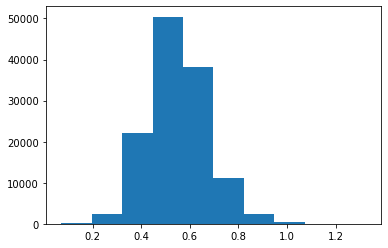

In [43]:
# histogram of t_dia
plt.hist(data_predictors_dummies['t_dia'])

(array([1.21099e+05, 5.04200e+03, 5.96000e+02, 4.02000e+02, 2.77000e+02,
        8.10000e+01, 2.10000e+01, 2.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([0.26923 , 0.903847, 1.538464, 2.173081, 2.807698, 3.442315,
        4.076932, 4.711549, 5.346166, 5.980783, 6.6154  ]),
 <BarContainer object of 10 artists>)

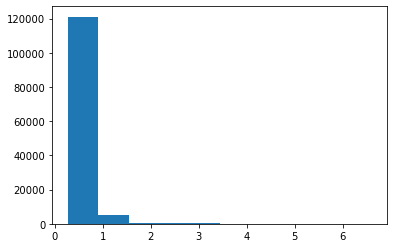

In [44]:
# histogram of t_ratio
plt.hist(data_predictors_dummies['t_ratio'])

(array([5.3593e+04, 5.9721e+04, 1.1441e+04, 1.7690e+03, 7.0000e+02,
        2.0700e+02, 5.9000e+01, 2.3000e+01, 7.0000e+00, 4.0000e+00]),
 array([0.034532 , 0.1545088, 0.2744856, 0.3944624, 0.5144392, 0.634416 ,
        0.7543928, 0.8743696, 0.9943464, 1.1143232, 1.2343   ]),
 <BarContainer object of 10 artists>)

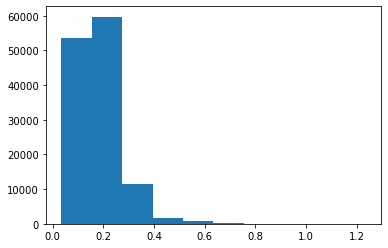

In [45]:
# histogram of delta_t
plt.hist(data_predictors_dummies['delta_t'])

(array([8.5540e+03, 1.5643e+04, 2.6577e+04, 4.9357e+04, 2.6927e+04,
        3.8500e+02, 6.1000e+01, 1.1000e+01, 8.0000e+00, 1.0000e+00]),
 array([0.070707 , 0.1212123, 0.1717176, 0.2222229, 0.2727282, 0.3232335,
        0.3737388, 0.4242441, 0.4747494, 0.5252547, 0.57576  ]),
 <BarContainer object of 10 artists>)

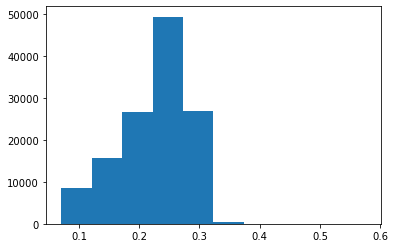

In [46]:
# histogram of prop_s
plt.hist(data_predictors_dummies['prop_s'])

In [47]:
# undersampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 42)

In [49]:
Counter(data_output_cv)

Counter({0: 117223, 1: 10301})

In [50]:
# fit and transorm
x_under, y_under = undersample.fit_resample(data_predictors_dummies,data_output_cv)

In [51]:
Counter(y_under)

Counter({0: 10301, 1: 10301})

In [52]:
x_under

,index,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,8245,0.80270,0.12973,0.202700,0.25253,0.28378,0.51892,0.54688,0.16162,0.17027,...,0,0,0,1,0,0,0,1,1,0
1,122368,0.80270,0.14595,0.210810,0.26263,0.30811,0.49459,0.62295,0.18182,0.18649,...,0,0,1,0,0,1,0,0,1,0
2,152193,0.76154,0.12308,0.200000,0.26263,0.28462,0.47692,0.59677,0.16162,0.16154,...,0,1,0,1,0,0,0,1,0,1
3,87219,0.94286,0.31429,0.095238,0.10101,0.35238,0.59048,0.59677,0.33333,0.27619,...,0,0,0,1,0,0,0,1,1,0
4,67164,0.71566,0.22410,0.231330,0.32323,0.42651,0.28916,1.47500,0.31313,0.36867,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20597,168571,0.71566,0.11566,0.180720,0.25253,0.25301,0.46265,0.54688,0.16162,0.15904,...,0,0,0,1,0,0,0,1,1,0
20598,168597,1.06070,0.19286,0.225000,0.21212,0.36429,0.69643,0.52308,0.18182,0.22500,...,0,0,1,0,0,0,0,1,1,0
20599,168604,0.90000,0.20000,0.218180,0.24242,0.32727,0.57273,0.57143,0.22222,0.22727,...,0,1,1,0,0,0,0,1,1,0
20600,168644,0.95806,0.13548,0.261290,0.27273,0.35806,0.60000,0.59677,0.14141,0.20323,...,0,1,0,1,0,0,0,1,1,0


The dustribution seems to be similar to the original data

In [59]:
x_under.to_csv("x_under_cv.csv")
y_under.to_csv("y_under_cv.csv")